
# Lab 1 (Проведение исследований с алгоритмом KNN)
### Выполнил: Черевичин Е.В.
---



Настраиваем import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error,explained_variance_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_classification




## Выбранный датасет Financial Risk for Loan Approval Для задачи классификации KNN

Kagle: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

---
Причина выбора данного датасета:
 - Мир финансов занимает важную роль в жизни современного человека, считаю что данный дата сет решает актуальную проблему  
 - Возможность быстро обрабатываеть и тестировать данные, данный датасет не большого размера (что может сказаться на точности, но большие датасеты будут тяжело обучаться на моем ноутбуке)  
 - Датасет находился в открытом доступе
 - Включает в себя разные типы данных, тем самым предоставляя возможность поработать с разными методами обработки.



In [2]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Подготовим данны для классификации

In [3]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

### Преобразование целевой переменной
LoanApproved: 0 - отклонено, 1 - одобрено

In [4]:
le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Разделение данных

In [5]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделяем данные на тестовую и обучающую выборку

In [6]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [7]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)


### Обучение KNN для классификации

In [8]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_cls_scaled, y_train_cls)

KNeighborsClassifier()

## Предсказание

In [9]:
y_pred_cls = knn_classifier.predict(X_test_cls_scaled)

### Метрики качества для классификации

In [10]:
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8570
F1 Score: 0.6891


## Улучшение baseline

In [11]:
from sklearn.model_selection import GridSearchCV

### Подбор гиперпараметров

In [12]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [13]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_cls_scaled, y_train_cls)

print(f"Best Parameters: {grid_search.best_params_}")
best_knn_classifier = grid_search.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


### Предсказания с улучшенной моделью

In [14]:
y_pred_cls_improved = best_knn_classifier.predict(X_test_cls_scaled)

### Метрики качества для улучшенной классификации

In [15]:
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")

Improved Classification Metrics:
Accuracy: 0.8615
F1 Score: 0.6915


### Построение матрицы путаницы

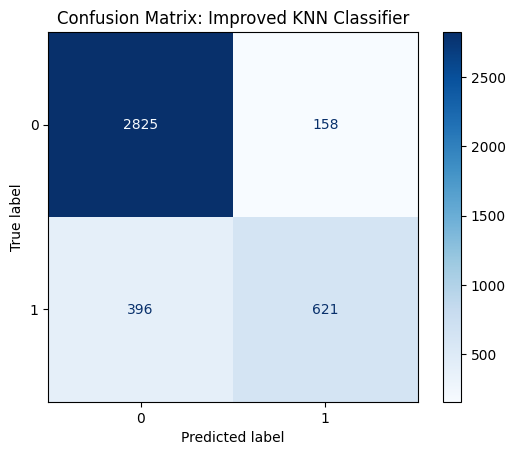

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn_classifier, X_test_cls_scaled, y_test_cls, cmap='Blues')
plt.title('Confusion Matrix: Improved KNN Classifier')
plt.show()

## Выводы
После начального обучения модели KNN с базовыми параметрами, такие метрики, как Accuracy и F1 Score, дали приемлемые результаты. Однако базовый подход не учитывал индивидуальных особенностей задачи и ограничивался использованием стандартных гиперпараметров

Матрица путаницы показывает, что количество ошибок классификации значительно сократилось, а большинство объектов были правильно классифицированы.

## Задача Регресии KNN
----

### Загрузка датасета

### Laptop Price

Kagle: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

---
Причина выбора данного датасета:
 - Данный датасет идеально подходит для задачи регрессии
 - Датасет содержит монжество данных дребующих обработку, что дает возможность значительно улучшить baseline и точность данной модели, тем самым продемострировать важность обработки данных.
 - Возможность быстро обрабатываеть и тестировать данные, данный датасет не большого размера (что может сказаться на точности, но большие датасеты будут тяжело обучаться на моем ноутбуке)  
 - Датасет находился в открытом доступе






In [17]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [18]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_df[column] = le.fit_transform(laptop_df[column])
    label_encoders[column] = le

### Удаляем лишние столбцы

In [19]:
laptop_df.drop(['Memory','laptop_ID','Ram','Weight'], axis=1, inplace=True)
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,1,300,4,13.3,23,65,58,8,1339.69
1,1,301,4,13.3,1,63,51,8,898.94
2,7,50,3,15.6,8,74,53,4,575.00
3,1,300,4,15.4,25,85,9,8,2537.45
4,1,300,4,13.3,23,67,59,8,1803.60


### Маштабируем значения

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_df.columns[:-1])

### Добавление целевой переменной

In [21]:
data_scaled['Price_euros'] = laptop_df['Price_euros']
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,0.153493,3.083616,1339.69
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.170358,3.083616,898.94
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.077829,-0.781657,575.00
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,-2.113462,3.083616,2537.45
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,0.199757,3.083616,1803.60
...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.355416,0.184661,638.00
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,-0.355416,0.184661,1499.00
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-0.679266,0.184661,229.00
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-1.558290,0.184661,764.00


### Разделение данных


In [22]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [23]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

## Предсказание и оценка

In [24]:
y_pred = knn.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 290.44578544061307
MSE: 221421.86028467433
R²: 0.5640671445813243
MAPE: 29.96%


## Улучшение безлайна

In [26]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [27]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [28]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [29]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [30]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [31]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [32]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [34]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [35]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [36]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

## Предсказание и оценка

In [37]:
y_pred = knn.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.1992670177627925
MSE: 0.07457061837134189
R²: 0.7890601483815123
MAPE: 2.92%


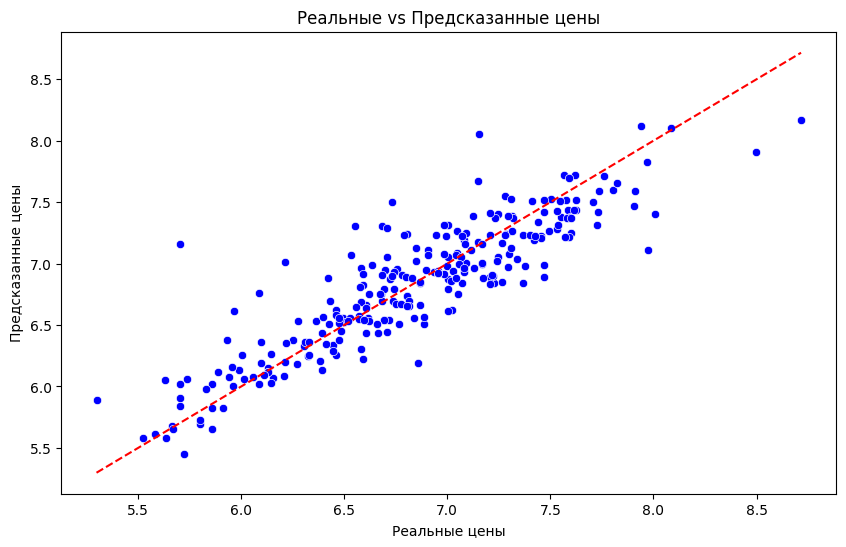

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

## Выводы
Было замечено улучшение следующих метрик:
- MAE (Mean Absolute Error): Уменьшение абсолютной средней ошибки указывает на повышение точности предсказаний.
- MSE (Mean Squared Error): Снижение квадратичной ошибки демонстрирует уменьшение крупных отклонений в предсказаниях.
- R² (Коэффициент детерминации): Увеличение значения указывает на лучшее соответствие модели данным.
- MAPE (Mean Absolute Percentage Error): Снижение средней абсолютной процентной ошибки подтверждает увеличение точности.

### Общая интерпретация:
После улучшения базовой модели метрики модели стали демонстрировать лучшую точность. Это подтверждает гипотезу о том, что добавление новых признаков, учет соотношений, логарифмирование и корректный препроцессинг данных способны значительно повысить качество регрессионной модели.


## Имплементирование алгоритмов
----

### Имплементация алгоритма KNN классификации


In [40]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=5):
        """
        Инициализация модели KNN.
        :param k: количество ближайших соседей для классификации
        """
        self.k = k  # Количество соседей

    def fit(self, X, y):
        """
        Обучение модели KNN.
        :param X: Признаки обучающего набора
        :param y: Целевые значения для обучающего набора
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые классы
        """
        predictions = [] # Список для хранения прогнозов
        for x in np.array(X):
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Евклидово расстояние
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)  # Возвращаем массив предсказанных классов

### Подготовка данных для обучение имплементированной модели на обычном baseline

In [41]:
data = pd.read_csv('financial_risk_loan_approval.csv')

classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

X_classification = data[classification_features]
y_classification = data[classification_target]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

In [42]:
knn_baseline = KNNClassifier(k=5)
knn_baseline.fit(X_train_cls_scaled, y_train_cls)

y_pred_baseline = knn_baseline.predict(X_test_cls_scaled)

### Метрики

In [43]:
accuracy_baseline = accuracy_score(y_test_cls, y_pred_baseline)
f1_baseline = f1_score(y_test_cls, y_pred_baseline)
print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"F1 Score: {f1_baseline:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8570
F1 Score: 0.6891


### Улучшайем baseline

In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

class ImprovedKNNClassifier:
    def __init__(self, k=5, weighted=True):
        """
        Улучшенный KNN-классификатор.
        :param k: Количество ближайших соседей
        :param weighted: Использовать ли веса соседей
        """
        self.k = k
        self.weighted = weighted
        self.scaler = StandardScaler()

    def fit(self, X, y):
        """
        Обучение модели.
        :param X: Признаки обучающего набора
        :param y: Целевые значения
        """
        self.X_train = self.scaler.fit_transform(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые классы
        """
        X_test = self.scaler.transform(X)
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            if self.weighted:
                weights = 1 / (distances[k_indices] + 1e-5)  # Для предотвращения деления на ноль
                predicted_label = np.bincount(k_nearest_labels, weights=weights).argmax()
            else:
                predicted_label = np.bincount(k_nearest_labels).argmax()

            predictions.append(predicted_label)

        return np.array(predictions)

    def tune_k(self, X, y, k_values):
        """
        Подбор оптимального значения k.
        :param X: Признаки обучающего набора
        :param y: Целевые значения
        :param k_values: Список возможных значений k
        :return: Оптимальное значение k
        """
        X_scaled = self.scaler.fit_transform(X)
        best_k = None
        best_score = 0
        for k in k_values:
            self.k = k
            preds = self.predict(X_scaled)
            score = accuracy_score(y, preds)
            if score > best_score:
                best_score = score
                best_k = k
        self.k = best_k
        return best_k

    def evaluate(self, X, y):
        """
        Оценка модели с использованием точности и F1-метрики.
        :param X: Признаки тестового набора
        :param y: Целевые значения
        :return: Точность и F1-метрика
        """
        preds = self.predict(X)
        accuracy = accuracy_score(y, preds)
        f1 = f1_score(y, preds, average='weighted')
        return accuracy, f1

### Масштабируйте данные

In [45]:
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создайте и обучите модель

In [46]:
knn = ImprovedKNNClassifier(k=5, weighted=True)
knn.fit(X_train, y_train)

### Найдите оптимальное значение k

In [47]:
best_k = knn.tune_k(X_train, y_train, k_values=range(3, 20))
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 4


### Обучение

In [48]:
predictions = knn.predict(X_test)

### Метрики

In [49]:
accuracy, f1 = knn.evaluate(X_test, y_test)
print(f"Точность модели: {accuracy}")
print(f"F1-метрика модели: {f1}")

Точность модели: 0.87
F1-метрика модели: 0.8698820445609436


Ввыводы
- Имплементация данного алгоритма обучения оказалось не сложной, метрики для данного алгоритма демострируют одинаковый результат(на уровне погрешности)
- ImprovedKNNClassifier демонтсрирует лучшие показатели по всем моделям.
  - В ImprovedKNNClassifier используется стандартизация признаков с помощью StandardScaler. Это улучшает точность и F1-метрику, особенно если признаки имеют разные масштабы
  - ImprovedKNNClassifier учитывает веса соседей, что позволяет более близким точкам в пространстве признаков оказывать большее влияние на итоговое предсказани
  - ImprovedKNNClassifier включает функцию подбора оптимального значения k


## Имплементация алгоритма KNN регресия

In [50]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

class KNNRegressor:
    def __init__(self, k=5):
        """
        Инициализация модели KNN для регрессии.
        :param k: количество ближайших соседей для регрессии
        """
        self.k = k  # Количество соседей

    def fit(self, X, y):
        """
        Обучение модели KNN.
        :param X: Признаки обучающего набора
        :param y: Целевые значения для обучающего набора
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """
        Прогнозирование для новых данных.
        :param X: Признаки тестового набора
        :return: Прогнозируемые значения
        """
        predictions = []  # Список для хранения прогнозов
        X = np.array(X)  # Преобразуем X в numpy массив, если это еще не так

        for x in X:
            # Ensure both arrays are numeric before calculating distances
            # Convert to float if possible, or handle non-numeric data appropriately

            X_train_numeric = np.array(self.X_train, dtype=np.float64)
            x_numeric = np.array(x, dtype=np.float64)

            distances = np.linalg.norm(X_train_numeric - x_numeric, axis=1)  # Евклидово расстояние
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_values = self.y_train[k_indices]
            predicted_value = np.mean(k_nearest_values)
            predictions.append(predicted_value)

        return np.array(predictions)

In [51]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Работа с данными

In [52]:
laptop_df = pd.get_dummies(laptop_df, drop_first=True)

features = laptop_df.drop(columns=['Price_euros'])
target = laptop_df['Price_euros']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Обучение модели

In [54]:
knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train, y_train)

### Прогнозирование данных

In [55]:
predictions = knn_regressor.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 540.5711
MSE: 576113.4637
R²: -0.1342
MAPE: 68.23%


## Улучшение Baseline

In [57]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [58]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [59]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [60]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [61]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [62]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [63]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [64]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

In [65]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [66]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train, y_train)

### Прогнозирование данных

In [68]:
predictions = knn_regressor.predict(X_test)

In [69]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.1991
MSE: 0.0744
R²: 0.7895
MAPE: 2.92%


# 2 Lab (Проведение исследований с логистической и линейной регрессией)

----

### Загрузка данных

In [70]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


### Преобразование целевой переменной



In [71]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Формирование новых признаков

In [72]:
data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

### Обновление списка признаков


In [73]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [74]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [75]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [76]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание базовой модели логистической регрессии

In [77]:
log_reg = LogisticRegression(random_state=13)
log_reg.fit(X_train_cls_scaled, y_train_cls)

LogisticRegression(random_state=13)

### Предсказания и метрики для базовой модели

In [78]:
y_log_pred_cls = log_reg.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, y_log_pred_cls)
f1 = f1_score(y_test_cls, y_log_pred_cls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8845
F1 Score: 0.7566


### Улучшение baseline

### Подбор гиперпараметров для логистической регрессии

In [79]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=13, max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1'
)
grid_search.fit(X_train_cls_scaled, y_train_cls)

# Лучшая модель
best_log_reg = grid_search.best_estimator_


### Лучшая модель

In [80]:
best_log_reg = grid_search.best_estimator_

### Предсказания и метрики для улучшенной модели

In [81]:
y_pred_cls_improved = best_log_reg.predict(X_test_cls_scaled)
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Improved Classification Metrics:
Accuracy: 0.8848
F1 Score: 0.7572
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


### Вывод:
После применения улучшений базовой модели логистической регрессии, включая подбор гиперпараметров с использованием GridSearchCV, метрики качества (F1 Score и Accuracy) изменились незначительно

Таким образом, не всегда добавление сложности к модели  приводит к улучшению. Если исходная модель уже показывает хорошие результаты, её можно считать достаточной для решения задачи.

## Задача Линейной регрессии
----

In [82]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [83]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_df[column] = le.fit_transform(laptop_df[column])
    label_encoders[column] = le

### Удаляем лишние столбцы

In [84]:
laptop_df.drop(['Memory','laptop_ID','Ram','Weight'], axis=1, inplace=True)
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,1,300,4,13.3,23,65,58,8,1339.69
1,1,301,4,13.3,1,63,51,8,898.94
2,7,50,3,15.6,8,74,53,4,575.00
3,1,300,4,15.4,25,85,9,8,2537.45
4,1,300,4,13.3,23,67,59,8,1803.60


### Маштабируем значения

In [85]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_df.columns[:-1])

### Добавление целевой переменной

In [86]:
data_scaled['Price_euros'] = laptop_df['Price_euros']
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price_euros
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,0.153493,3.083616,1339.69
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.170358,3.083616,898.94
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.077829,-0.781657,575.00
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,-2.113462,3.083616,2537.45
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,0.199757,3.083616,1803.60
...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.355416,0.184661,638.00
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,-0.355416,0.184661,1499.00
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-0.679266,0.184661,229.00
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-1.558290,0.184661,764.00


### Разделение данных


In [87]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [88]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Предсказание и оценка

In [89]:
y_pred = lr.predict(X_test)

In [90]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 409.69251645221146
MSE: 336205.7983172144
R²: 0.3380818249819255
MAPE: 47.28%


## Улучшение безлайна

In [91]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [92]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [93]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [94]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [95]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [96]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [97]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [98]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [99]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [100]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

## Предсказание и оценка

In [102]:
y_pred = lr.predict(X_test)

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.23712784498844855
MSE: 0.09076025260612842
R²: 0.7432641080933995
MAPE: 3.52%


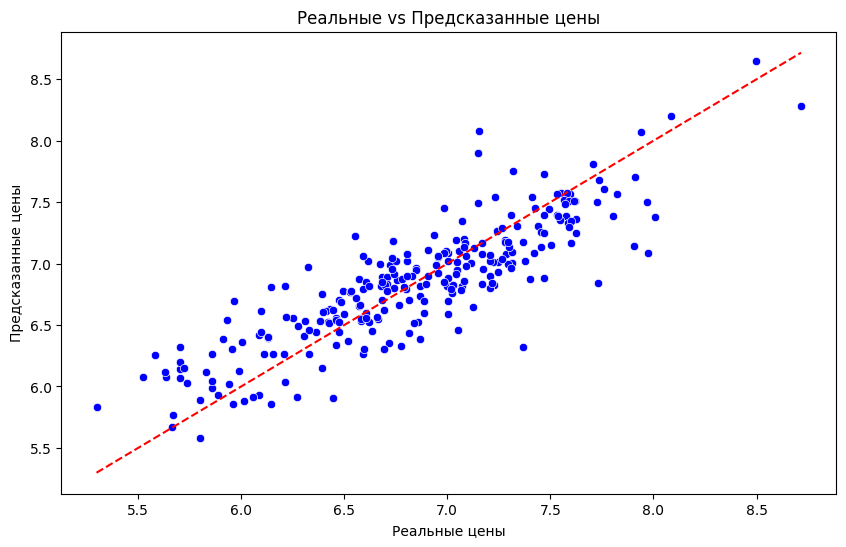

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

### Собственная имплементация алгоритма

In [105]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


### Преобразование целевой переменной



In [106]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])


### Визуализация данных

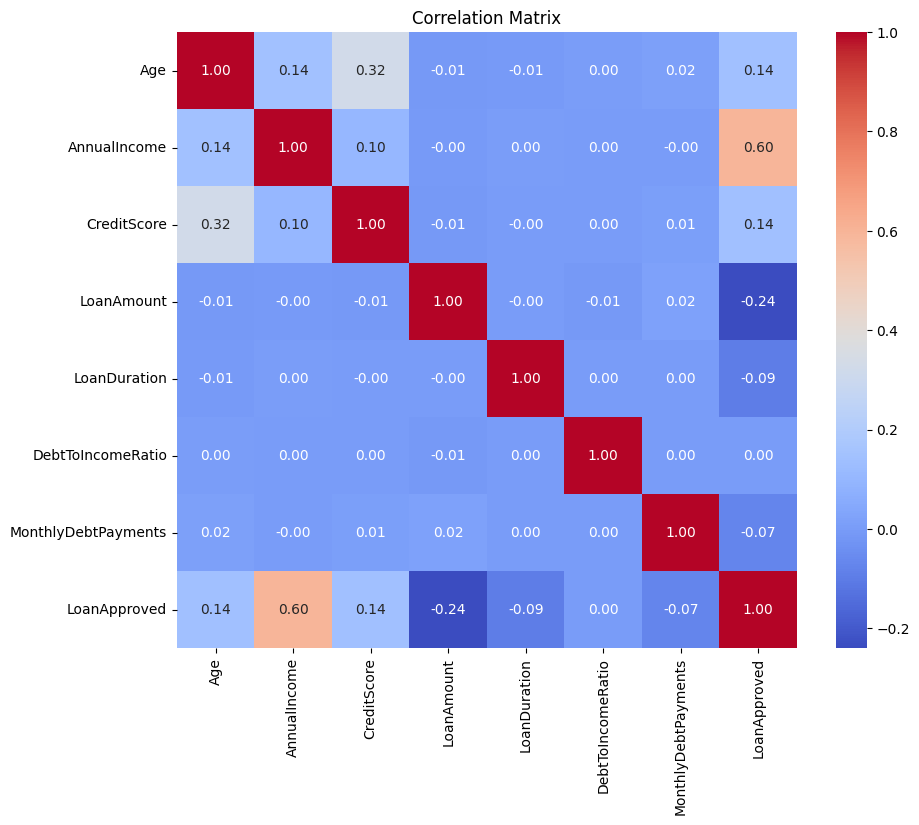

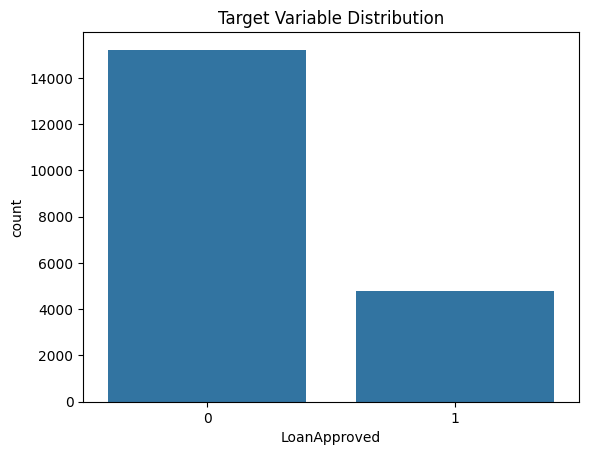

In [107]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[classification_features + [classification_target]].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.countplot(x=classification_target, data=data)
plt.title("Target Variable Distribution")
plt.show()


### Формирование новых признаков

In [108]:
data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

### Обновление списка признаков


In [109]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [110]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [111]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [112]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

In [113]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        # Градиентный спуск
        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Вычисление градиентов
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

custom_log_reg = LogisticRegressionCustom(learning_rate=0.01, num_iterations=1000)
custom_log_reg.fit(X_train_cls_scaled, y_train_cls)

y_custom_pred_cls = custom_log_reg.predict(X_test_cls_scaled)

accuracy_custom = accuracy_score(y_test_cls, y_custom_pred_cls)
f1_custom = f1_score(y_test_cls, y_custom_pred_cls)

print(f"Custom Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_custom:.4f}")
print(f"F1 Score: {f1_custom:.4f}")

Custom Logistic Regression Metrics:
Accuracy: 0.8780
F1 Score: 0.7413


In [114]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

### Обработаем Ram, Memory, Weight
-  Ram убираем kg и меняем тип на int
- Weight убираем kg и меняем тип на float
- Memory парсим текстовые данные в два числовых категориальных признака

In [115]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [116]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [117]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [118]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [119]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [120]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)
laptop_greater_baseline_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg,HDD_per_kg
0,1,300,4,13.3,23,65,8,58,8,1.37,1339.69,128,0,93.430657,0.0
1,1,301,4,13.3,1,63,8,51,8,1.34,898.94,128,0,95.522388,0.0
2,7,50,3,15.6,8,74,8,53,4,1.86,575.00,256,0,137.634409,0.0
3,1,300,4,15.4,25,85,16,9,8,1.83,2537.45,512,0,279.781421,0.0
4,1,300,4,13.3,23,67,8,59,8,1.37,1803.60,256,0,186.861314,0.0


### Маштабируем значения

In [121]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [122]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])

### Разделение данных

In [123]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
import numpy as np

class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        # Градиентный спуск
        for i in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            # Вычисление градиентов
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

custom_lin_reg = LinearRegressionCustom(learning_rate=0.01, num_iterations=1000)
custom_lin_reg.fit(X_train, y_train)

# Предсказания
y_custom_pred = custom_lin_reg.predict(X_test)

In [125]:
mae = mean_absolute_error(y_test, y_custom_pred)
mse = mean_squared_error(y_test, y_custom_pred)
r2 = r2_score(y_test, y_custom_pred)
explained_variance = explained_variance_score(y_test, y_custom_pred)
mape = np.mean(np.abs((y_test - y_custom_pred) / y_test)) * 100

# Вывод результатов
print(f"Custom Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance: {explained_variance:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Custom Linear Regression Metrics:
Mean Absolute Error (MAE): 0.2385
Mean Squared Error (MSE): 0.0908
R² Score: 0.7431
Explained Variance: 0.7432
Mean Absolute Percentage Error (MAPE): 3.54%


# Lab 3 Решающее дерево

## Задача классификации

In [126]:
data = pd.read_csv('financial_risk_loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


### Преобразование целевой переменной



In [127]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Формирование новых признаков

In [128]:
data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

### Обновление списка признаков


In [129]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [130]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [131]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [132]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание базовой модели логистической регрессии

In [133]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=13)
decision_tree.fit(X_train_cls_scaled, y_train_cls)

DecisionTreeClassifier(random_state=13)

### Предсказания и метрики для базовой модели

In [134]:
y_decision_tree_сls = decision_tree.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, y_decision_tree_сls)
f1 = f1_score(y_test_cls, y_decision_tree_сls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8257
F1 Score: 0.6544


## Улучшение baseline

### Подбор гиперпараметров для логистической регрессии

In [135]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [136]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=13),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_cls_scaled, y_train_cls)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

### Лучшая модель

In [137]:
best_decision_tree = grid_search.best_estimator_

### Предсказания и метрики для улучшенной модели

In [138]:
y_pred_cls_improved = best_decision_tree.predict(X_test_cls_scaled)
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Improved Classification Metrics:
Accuracy: 0.8628
F1 Score: 0.7237
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Задача Регрессии с решающим деревом
----

In [139]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [140]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_df[column] = le.fit_transform(laptop_df[column])
    label_encoders[column] = le

### Удаляем лишние столбцы

In [141]:
laptop_df.drop(['Memory','laptop_ID','Ram','Weight'], axis=1, inplace=True)

### Маштабируем значения

In [142]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_df.columns[:-1])

### Добавление целевой переменной

In [143]:
data_scaled['Price_euros'] = laptop_df['Price_euros']

### Разделение данных


In [144]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [145]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Предсказание и оценка

In [146]:
y_pred = dt_regressor.predict(X_test)

In [147]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 241.70772669220946
MSE: 152177.13826615582
R²: 0.7003953704999218
MAPE: 23.12%


## Улучшение безлайна

In [148]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

In [149]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [150]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [151]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [152]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [153]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [154]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)

### Маштабируем значения

In [155]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [156]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])
data_scaled

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,SSD_per_kg
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,-0.075195,0.153493,3.083616,-1.005283,7.200940,-0.800444,-0.126811,-0.781379
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,6.802328,-0.800444,-0.110087,-0.781379
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,6.356108,-0.800444,0.226593,-0.781379
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,1.498767,-2.113462,3.083616,-0.313782,7.839309,-0.800444,1.363040,-0.781379
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,-0.075195,0.199757,3.083616,-1.005283,7.498094,-0.800444,0.620156,-0.781379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.479052,0.477194,-0.862176,-0.355416,0.184661,-0.358880,6.459904,-0.800444,-0.305252,-0.781379
1299,0.871310,1.628389,-2.074710,-1.204407,1.240278,0.477194,1.498767,-0.355416,0.184661,-1.110512,7.313220,-0.800444,2.274973,-0.781379
1300,0.871310,-0.653044,0.335406,-0.713439,-1.170270,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,5.438079,-0.800444,-0.532662,-0.781379
1301,0.136477,-1.782120,0.335406,0.408772,-1.170270,0.477194,-0.468686,-1.558290,0.184661,0.227393,6.639876,1.139671,-0.873777,1.249290


### Разделение данных

In [157]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [158]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Предсказание и оценка

In [159]:
y_pred = dt_regressor.predict(X_test)

In [160]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.18318520625463436
MSE: 0.06114330022522893
R²: 0.8270423531591489
MAPE: 2.69%


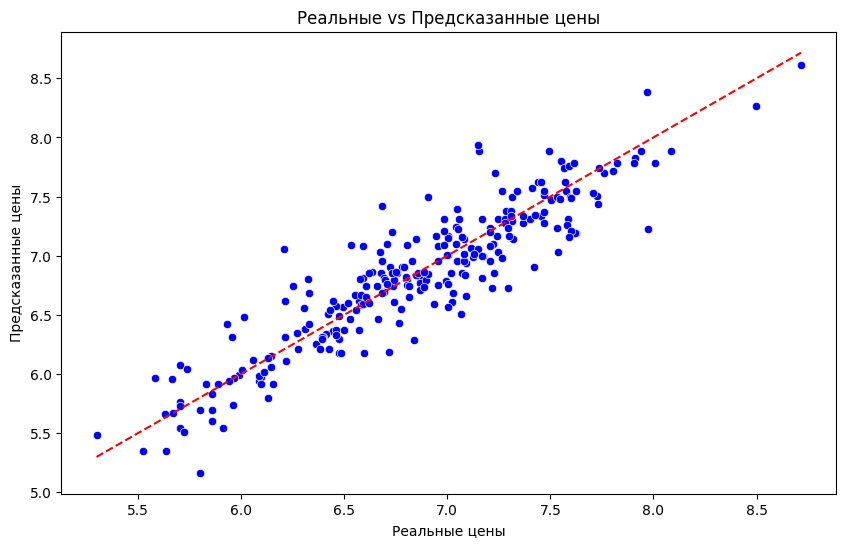

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

## Собственная имплементация алгоритма

### Собственная имплементация

In [162]:
class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree_ = None

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()

            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((x / i) ** 2 for x in num_left)
                gini_right = 1.0 - sum((x / (m - i)) ** 2 for x in num_right)
                gini = (i * gini_left + (m - i) * gini_right) / m

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {"gini": self._gini(y), "num_samples": len(y),
                "num_samples_per_class": num_samples_per_class,
                "predicted_class": predicted_class}

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node["feature_index"] = idx
                node["threshold"] = thr
                node["left"] = self._grow_tree(X_left, y_left, depth + 1)
                node["right"] = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while "threshold" in node:
            if inputs[node["feature_index"]] < node["threshold"]:
                node = node["left"]
            else:
                node = node["right"]
        return node["predicted_class"]

data = pd.read_csv('financial_risk_loan_approval.csv')
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

X_classification = data[classification_features].to_numpy()
y_classification = data[classification_target].to_numpy()

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

tree = DecisionTreeClassifierCustom(max_depth=3, min_samples_split=2)
tree.fit(X_train_cls, y_train_cls)

predictions = tree.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, predictions)
print(f'Accuracy of Custom Decision Tree: {f1:.2f}')


Accuracy of Custom Decision Tree: 0.65


### Алгоритм решающий задачу регресии

In [163]:
import re

class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature  # Индекс признака
            self.threshold = threshold  # Порог для разделения
            self.left = left  # Левый дочерний узел
            self.right = right  # Правый дочерний узел
            self.value = value  # Значение, если узел является листом

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples >= self.min_samples_split and (self.max_depth is None or depth < self.max_depth):
            best_split = self._best_split(X, y, n_features)
            if best_split:
                left_indices, right_indices = best_split['indices_left'], best_split['indices_right']
                left_node = self._build_tree(X[left_indices], y[left_indices], depth + 1)
                right_node = self._build_tree(X[right_indices], y[right_indices], depth + 1)
                return self.Node(feature=best_split['feature'], threshold=best_split['threshold'],
                                 left=left_node, right=right_node)

        # Если узел является листом, возвращаем среднее значение
        leaf_value = np.mean(y)
        return self.Node(value=leaf_value)

    def _best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_split = None
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                mse = self._calculate_mse(y, left_indices, right_indices)
                if mse < best_mse:
                    best_mse = mse
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'indices_left': left_indices,
                        'indices_right': right_indices
                    }
        return best_split

    def _calculate_mse(self, y, left_indices, right_indices):
        left_mean = np.mean(y[left_indices])
        right_mean = np.mean(y[right_indices])
        mse_left = np.mean((y[left_indices] - left_mean) ** 2)
        mse_right = np.mean((y[right_indices] - right_mean) ** 2)
        return (len(left_indices) * mse_left + len(right_indices) * mse_right) / (len(left_indices) + len(right_indices))

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, node):
        if node.value is not None:
            return node.value
        if sample[node.feature] <= node.threshold:
            return self._predict_sample(sample, node.left)
        else:
            return self._predict_sample(sample, node.right)

In [164]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

def parse_memory(memory):
    ssd, hdd = 0, 0
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component
        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

laptop_greater_baseline_df.drop(['Memory', 'laptop_ID'], axis=1, inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])

X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=5)
dt_regressor.fit(X_train.to_numpy(), y_train.to_numpy())


y_pred = dt_regressor.predict(X_test.to_numpy())

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")

MAE: 0.18318520625463436


# Lab 4 Случайный лес

In [165]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Обновление списка признаков


In [166]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [167]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [168]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [169]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание базовой модели логистической регрессии

In [170]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=13)
random_forest.fit(X_train_cls_scaled, y_train_cls)

RandomForestClassifier(random_state=13)

### Предсказания и метрики для базовой модели

In [171]:
y_сls = random_forest.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, y_сls)
f1 = f1_score(y_test_cls, y_сls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8785
F1 Score: 0.7437


In [172]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [173]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=13),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_cls_scaled, y_train_cls)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

### Лучшая модель

In [174]:
best_random_forest = grid_search.best_estimator_

### Предсказания и метрики для улучшенной модели

In [175]:
y_pred_cls_improved = best_random_forest.predict(X_test_cls_scaled)
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Improved Classification Metrics:
Accuracy: 0.8805
F1 Score: 0.7479
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


### Разделение данных


In [176]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [177]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Предсказание и оценка

In [178]:
y_pred = rf_regressor.predict(X_test)

In [179]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.13251191844547644
MSE: 0.034455421450825724
R²: 0.902535051377785
MAPE: 1.93%


### Улучшение baseline

In [180]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

In [181]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [182]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [183]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [184]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [185]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [186]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)

### Маштабируем значения

In [187]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [188]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])


### Разделение данных

In [189]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Предсказание и оценка

In [191]:
y_pred = rf_regressor.predict(X_test)

In [192]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.13251191844547644
MSE: 0.034455421450825724
R²: 0.902535051377785
MAPE: 1.93%


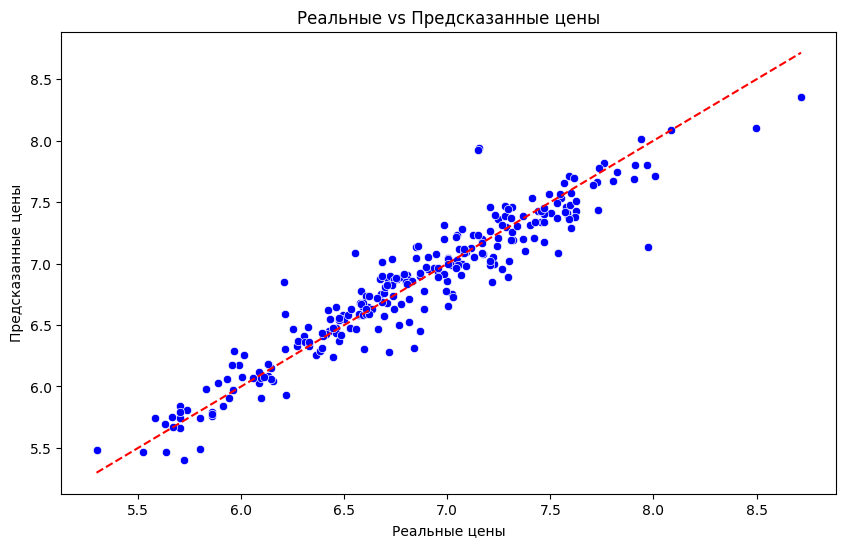

In [193]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

### Собственная имплементация

In [194]:
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_features="sqrt", max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.features_indices = []

    def _bootstrap_sample(self, X, y):
        X = np.array(X)  # Преобразуем в NumPy массив
        y = np.array(y)  # Преобразуем в NumPy массив
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _get_max_features(self, n_features):
        if self.max_features == "sqrt":
            return max(1, int(np.sqrt(n_features)))
        elif self.max_features == "log2":
            return max(1, int(np.log2(n_features)))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.features_indices = []

        n_features = X.shape[1]
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)

            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.features_indices.append(feature_indices)

            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([
            tree.predict(X[:, feature_indices]) for tree, feature_indices in zip(self.trees, self.features_indices)
        ])
        return np.round(tree_predictions.mean(axis=0)).astype(int)

In [195]:
data = pd.read_csv('financial_risk_loan_approval.csv')

## Подготовим данны для классификации

In [196]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

### Преобразование целевой переменной
LoanApproved: 0 - отклонено, 1 - одобрено

In [197]:
le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Разделение данных

In [198]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделяем данные на тестовую и обучающую выборку

In [199]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)


### Масштабирование данных

In [200]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание модели

In [201]:
custom_tree_classifier = CustomRandomForest(max_depth=5, random_state=42)
custom_tree_classifier.fit(X_train_cls_scaled, y_train_cls)

In [202]:
predictions = custom_tree_classifier.predict(X_test_cls_scaled)

In [203]:
accuracy_improved = accuracy_score(y_test_cls, predictions)
f1_improved = f1_score(y_test_cls, predictions)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")

Improved Classification Metrics:
Accuracy: 0.7458
F1 Score: 0.0000


### Собственная реализация задачи регресии

In [204]:
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_features="sqrt", max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.features_indices = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _get_max_features(self, n_features):
        if self.max_features == "sqrt":
            return max(1, int(np.sqrt(n_features)))
        elif self.max_features == "log2":
            return max(1, int(np.log2(n_features)))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.features_indices = []

        n_features = X.shape[1]
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)

            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.features_indices.append(feature_indices)

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([
            tree.predict(X[:, feature_indices]) for tree, feature_indices in zip(self.trees, self.features_indices)
        ])
        return tree_predictions.mean(axis=0)

### Чтение данных

In [205]:
data = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

In [206]:
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

In [207]:
def parse_memory(memory):
    ssd, hdd = 0, 0
    components = re.findall(r'(\d+(?:\.\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)
    for component in components:
        size, unit, storage_type = component
        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)
        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb
    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [208]:
data[['SSD', 'HDD']] = data['Memory'].apply(parse_memory)
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data['SSD_per_kg'] = data['SSD'] / data['Weight']
data['HDD_per_kg'] = data['HDD'] / data['Weight']
data.drop(['Memory', 'laptop_ID'], axis=1, inplace=True)

### Маштабируем значения

In [209]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['Price_euros'] = np.log1p(data['Price_euros'])

### Разделение данных


In [210]:
X = data_scaled.drop('Price_euros', axis=1).values
y = data_scaled['Price_euros'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание и обучение модели

In [211]:
custom_rf = CustomRandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
custom_rf.fit(X_train, y_train)

### Предсказание и оценка

In [212]:
y_pred = custom_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")


MAE: 0.16660811702505474
MSE: 0.04512052569176316
R²: 0.8723663930615008
MAPE: 2.46%


# Lab 5 Градиентный бустинг

## Задача классификации

In [213]:
data = pd.read_csv('financial_risk_loan_approval.csv')

### Преобразование целевой переменной



In [214]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Формирование новых признаков

In [215]:
data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

### Обновление списка признаков


In [216]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [217]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [218]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [219]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание базовой модели логистической регрессии

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=13)
gbc.fit(X_train_cls_scaled, y_train_cls)

GradientBoostingClassifier(random_state=13)

### Предсказания и метрики для базовой модели

In [221]:
y_gbc_cls = gbc.predict(X_test_cls_scaled)
accuracy = accuracy_score(y_test_cls, y_gbc_cls)
f1 = f1_score(y_test_cls, y_gbc_cls)

print(f"Baseline Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Baseline Classification Metrics:
Accuracy: 0.8832
F1 Score: 0.7543


## Улучшение baseline

In [222]:
data = pd.read_csv('financial_risk_loan_approval.csv')

### Преобразование целевой переменной



In [223]:
classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments'
]
classification_target = 'LoanApproved'

le = LabelEncoder()
data[classification_target] = le.fit_transform(data[classification_target])

### Формирование новых признаков

In [224]:
data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

### Обновление списка признаков


In [225]:
classification_features += ['LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio', 'AgeGroup_Middle', 'AgeGroup_Old']

### Разделение данных на признаки и целевую переменную

In [226]:
X_classification = data[classification_features]
y_classification = data[classification_target]

### Разделение данных на обучающую и тестовую выборки

In [227]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

### Масштабирование данных

In [228]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

### Создание базовой модели логистической регрессии

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
best_random_forest = GradientBoostingClassifier(random_state=13)
best_random_forest.fit(X_train_cls_scaled, y_train_cls)

GradientBoostingClassifier(random_state=13)

### Предсказания и метрики для улучшенной модели

In [230]:
y_pred_cls_improved = best_random_forest.predict(X_test_cls_scaled)
accuracy_improved = accuracy_score(y_test_cls, y_pred_cls_improved)
f1_improved = f1_score(y_test_cls, y_pred_cls_improved)

print(f"Improved Classification Metrics:")
print(f"Accuracy: {accuracy_improved:.4f}")
print(f"F1 Score: {f1_improved:.4f}")

Improved Classification Metrics:
Accuracy: 0.8832
F1 Score: 0.7543


### Задача регресии

In [231]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [232]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_df[column] = le.fit_transform(laptop_df[column])
    label_encoders[column] = le

### Удаляем лишние столбцы

In [233]:
laptop_df.drop(['Memory','laptop_ID','Ram','Weight'], axis=1, inplace=True)

### Маштабируем значения

In [234]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_df.columns[:-1])

### Добавление целевой переменной

In [235]:
data_scaled['Price_euros'] = laptop_df['Price_euros']

### Разделение данных


In [236]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [237]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

### Предсказание и оценка

In [238]:
y_pred = gbr.predict(X_test)

In [239]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 205.29847853229762
MSE: 95914.92965336598
R²: 0.8111637707888624
MAPE: 20.67%


## Улучшим baseline


In [240]:
laptop_greater_baseline_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

### Прероцессинг данных

In [241]:
laptop_greater_baseline_df['Ram'] = laptop_greater_baseline_df['Ram'].str.replace('GB', '').astype(int)
laptop_greater_baseline_df['Weight'] = laptop_greater_baseline_df['Weight'].str.replace('kg', '').astype(float)

In [242]:
import re
def parse_memory(memory):
    ssd, hdd = 0, 0

    # Разделяем строку на компоненты по шаблону "<число><тип памяти>"
    components = re.findall(r'(\d+(?:\.?\d*)?)\s*(GB|TB)\s*(SSD|HDD|Flash Storage)?', memory)

    for component in components:
        size, unit, storage_type = component

        size_in_gb = float(size) * 1024 if unit == 'TB' else float(size)

        if 'SSD' in (storage_type or '') or 'Flash Storage' in (storage_type or ''):
            ssd += size_in_gb
        elif 'HDD' in (storage_type or ''):
            hdd += size_in_gb

    return pd.Series([int(ssd), int(hdd)])

### Обработка категориальных признаков

In [243]:
label_encoders = {}
for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']:
    le = LabelEncoder()
    laptop_greater_baseline_df[column] = le.fit_transform(laptop_greater_baseline_df[column])
    label_encoders[column] = le

In [244]:
laptop_greater_baseline_df[['SSD', 'HDD']] = laptop_greater_baseline_df['Memory'].apply(parse_memory)

### Введем комплексный признак


In [245]:
laptop_greater_baseline_df['SSD_per_kg'] = laptop_greater_baseline_df['SSD'] / laptop_greater_baseline_df['Weight']
laptop_greater_baseline_df['HDD_per_kg'] = laptop_greater_baseline_df['HDD'] / laptop_greater_baseline_df['Weight']

### Удаляем лишние столбцы

In [246]:
laptop_greater_baseline_df.drop(['Memory','laptop_ID'], axis=1, inplace=True)

### Маштабируем значения

In [247]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(laptop_greater_baseline_df.drop(['Price_euros'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=laptop_greater_baseline_df.columns[:-1])

### Добавление целевой переменной и логарифмирование

In [248]:
data_scaled['Price_euros'] = np.log1p(laptop_greater_baseline_df['Price_euros'])


### Разделение данных

In [249]:
X = data_scaled.drop('Price_euros', axis=1)
y = data_scaled['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Создание модели

In [250]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Предсказание и оценка

In [251]:
y_pred = gbr.predict(X_test)

In [252]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.14173549757087064
MSE: 0.03684702053316869
R²: 0.8957698727246037
MAPE: 2.07%


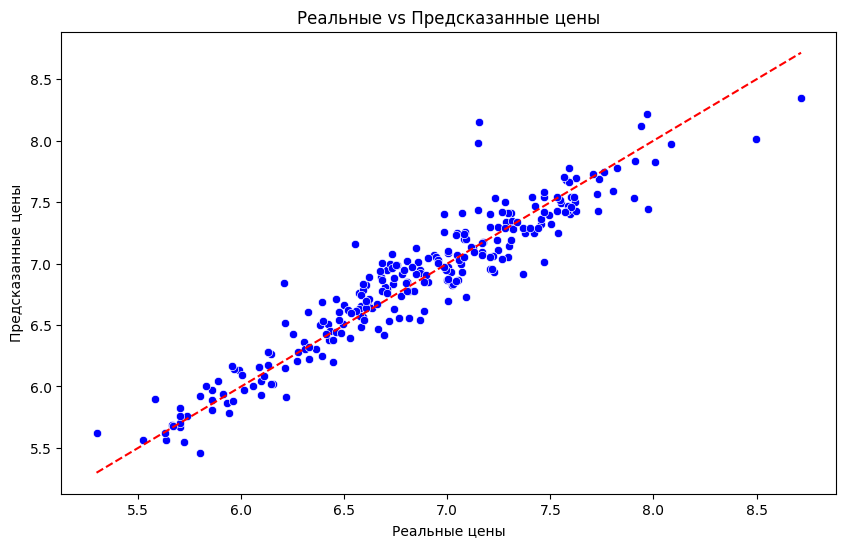

In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Реальные vs Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.show()

## Собственная имплементация

In [254]:

class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        for _ in range(self.n_estimators):
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residual)
            self.models.append(model)

            prediction = model.predict(X)
            residual -= self.learning_rate * prediction

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

### Обучение собственной модели

In [255]:
laptop_df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
laptop_df['Ram'] = laptop_df['Ram'].str.replace('GB', '').astype(int)
laptop_df['Weight'] = laptop_df['Weight'].str.replace('kg', '').astype(float)

# Пример обработки данных
X = laptop_df[['Ram', 'Weight']].values
y = laptop_df['Price_euros'].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Использование кастомного градиентного бустинга
gbr_custom = GradientBoostingRegressorCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_custom.fit(X_train, y_train)

# Предсказания
y_pred = gbr_custom.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 168355.3449234888


### Собственная имплементация для задачи классификации

In [256]:

class GradientBoostingClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prob = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Инициализируем вероятности (все примеры одинаково вероятны)
        self.initial_prob = np.mean(y)
        residual = y - self.initial_prob

        for _ in range(self.n_estimators):
            # Создаём дерево для предсказания градиента (остатка)
            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, residual)
            self.models.append(model)

            # Обновляем остаточную ошибку
            prediction = model.predict(X)
            residual -= self.learning_rate * prediction

    def predict_proba(self, X):
        # Начинаем с начальной вероятности
        prob = np.full(X.shape[0], self.initial_prob)

        # Добавляем вероятности каждого дерева
        for model in self.models:
            prob += self.learning_rate * model.predict(X)

        # Применяем сигмоид для получения вероятностей
        return self.sigmoid(prob)

    def predict(self, X):
        # Преобразуем вероятности в классы
        prob = self.predict_proba(X)
        return (prob > 0.5).astype(int)

### Обучение собственной модели

In [257]:
data = pd.read_csv('financial_risk_loan_approval.csv')

le = LabelEncoder()
if data['LoanApproved'].isnull().sum() > 0:
    data['LoanApproved'] = data['LoanApproved'].fillna('Unknown')
data['LoanApproved'] = le.fit_transform(data['LoanApproved'])

data['LogAnnualIncome'] = np.log1p(data['AnnualIncome'])
data['LogMonthlyDebtPayments'] = np.log1p(data['MonthlyDebtPayments'])
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['AnnualIncome']
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

classification_features = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
    'LoanDuration', 'DebtToIncomeRatio', 'MonthlyDebtPayments',
    'LogAnnualIncome', 'LogMonthlyDebtPayments', 'LoanToIncomeRatio',
    'AgeGroup_Middle', 'AgeGroup_Old'
]

X_classification = data[classification_features]
y_classification = data['LoanApproved']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)


gbc_custom = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc_custom.fit(X_train_cls_scaled, y_train_cls)

y_pred_cls = gbc_custom.predict(X_test_cls_scaled)


accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88
